In [35]:
#  Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [40]:
# Load Dataset
df = pd.read_csv("exchange_rate.csv")
df.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [41]:
# Rename Exchange Rate Column
df.columns = ['date', 'usd_aud']
df.head()



,date,usd_aud
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [42]:
#  Convert Date Column Properly 
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

df.set_index('date', inplace=True)
df.head()


,usd_aud
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


In [43]:
df.columns


Index(['usd_aud'], dtype='object')

In [44]:
# Check Missing Values 
df.isnull().sum()


usd_aud    0
dtype: int64

In [59]:
df["usd_aud"] = df["usd_aud"].ffill()

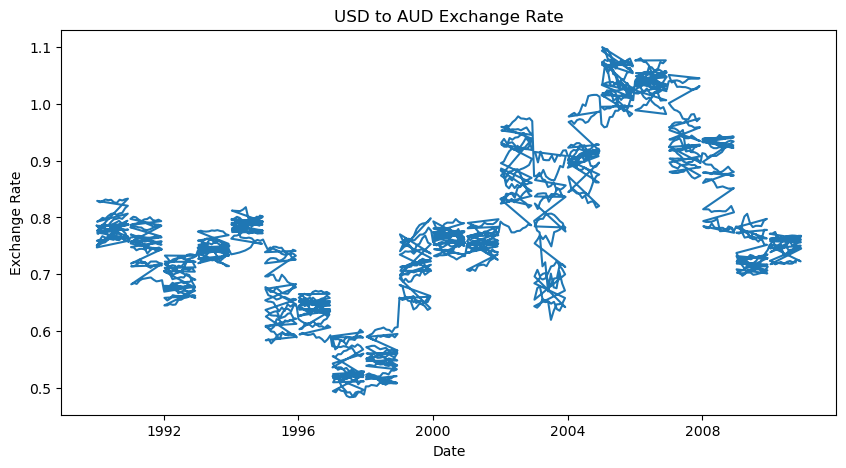

In [60]:
#  Plot Time Series
plt.figure(figsize=(10,5))
plt.plot(df['usd_aud'])
plt.title("USD to AUD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.show()


In [61]:
# Stationarity Test (ADF Test)
result = adfuller(df['usd_aud'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.6109670062791077
p-value: 0.4774680123411922


In [62]:
# Train–Test Split
train = df.iloc[:-20]
test = df.iloc[-20:]


In [63]:
# ARIMA Model 
arima_model = ARIMA(train["usd_aud"], order=(1,1,1))
arima_fit = arima_model.fit()

forecast_arima = arima_fit.forecast(steps=20)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Use

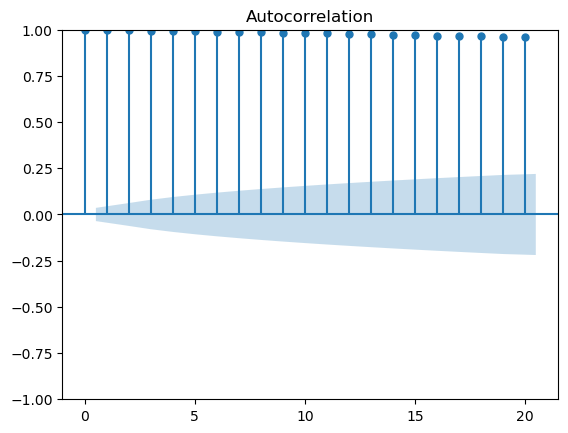

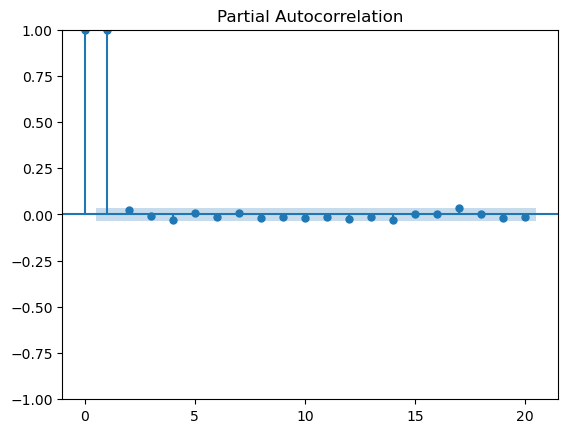

In [64]:
# ACF & PACF (For ARIMA p & q)
plot_acf(df['usd_aud'], lags=20)
plt.show()

plot_pacf(df['usd_aud'], lags=20)
plt.show()


In [65]:
# Exponential Smoothing Model
hw_model = ExponentialSmoothing(
    train['usd_aud'],
    trend='add',
    seasonal=None
)

hw_fit = hw_model.fit()
forecast_hw = hw_fit.forecast(20)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\am\.conda\envs\mlboost\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pr

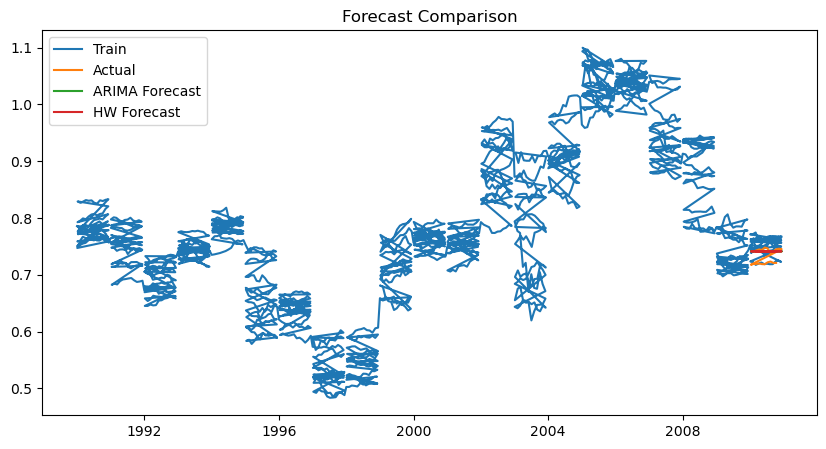

In [66]:
# Plot Forecast vs Actual
plt.figure(figsize=(10,5))
plt.plot(train.index, train['usd_aud'], label="Train")
plt.plot(test.index, test['usd_aud'], label="Actual")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast")
plt.plot(test.index, forecast_hw, label="HW Forecast")
plt.legend()
plt.title("Forecast Comparison")
plt.show()


In [67]:
#  Model Evaluation
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

mae_arima, rmse_arima = evaluate_model(test['usd_aud'], forecast_arima)
mae_hw, rmse_hw = evaluate_model(test['usd_aud'], forecast_hw)

print("ARIMA → MAE:", mae_arima, " RMSE:", rmse_arima)
print("Holt-Winters → MAE:", mae_hw, " RMSE:", rmse_hw)


ARIMA → MAE: 0.012329006150655668  RMSE: 0.015377428560451899
Holt-Winters → MAE: 0.012237500653338267  RMSE: 0.015232793065995901
